
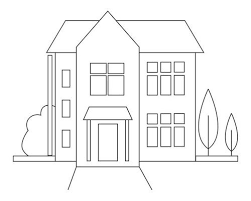


<center><h1 style='color:GREEN'>HOUSE RENT PREDICTION IN INDIA</h1></center>



    
### About the dataset
##### <p><strong> This Dataset contains information about 4700+ Houses available for Renting.
##### <p><strong>This dataset can be used to train machine learning models to predict rental prices for new properties based on their features. It is a useful dataset for exploring regression models.There has been tremendous growth in India's housing sector as incomes have risen.In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

### <i>Dataset Column-Wise details
<strong>BHK: Number of Bedrooms, Hall, Kitchen.

<strong>Rent: Rent of the Houses/Apartments/Flats.

<strong>Size: Size of the Houses/Apartments/Flats in Square Feet.

<strong>Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

<strong>Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

<strong>Area Locality: Locality of the Houses/Apartments/Flats.

<strong>City: City where the Houses/Apartments/Flats are Located.

<strong>Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

<strong>Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

<strong>Bathroom: Number of Bathrooms.

<strong>Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

# <I>Importing Libraries

In [1]:
# Start by importing the necessary python libraries

import pandas as pd                                                      #pandas is a library for data manipulation and analysis.
import numpy as np                                                        #numpy is a library for numerical computing
import seaborn as sns                                                    #seaborn is a library for data visualization based on matplotlib
import matplotlib.pyplot as plt                                          #plotting library for creating visualizations in Python.
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score         #splitting data into training and testing datasets
from sklearn.preprocessing import LabelEncoder,StandardScaler                #scaling numerical features
from sklearn.linear_model import LinearRegression,Ridge                      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

#Overall, these libraries provide a wide range of tools for data preprocessing, exploration, visualization,
#and machine learning modeling.

### <i>Importing Data

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## <center>DATA PREPROCESSING

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
df.columns
    

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
df.shape

(4746, 12)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [8]:
df.isnull().mean()*100

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

#### In this data no null values.

In [9]:
df.duplicated().sum()

0

#### In this data no duplicate values.

##### Renaming columns for column names contain some unwanted characters (e.g. space)

In [10]:
df.rename(
    columns=({'Area Type':'Area_Type','Area Locality':'Area_Locality','Furnishing Status':'Furnishing_Status','Tenant Preferred':'Tenant_Preferred' }), 
    inplace=True,
)

In [11]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## <center>DATA VISUALIZATION 

 ## <i>Univariate analysis


## Boxplot

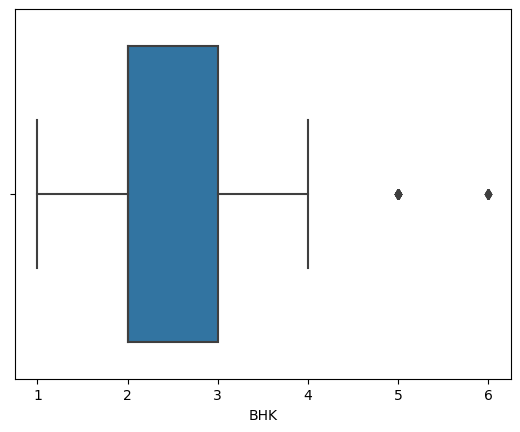

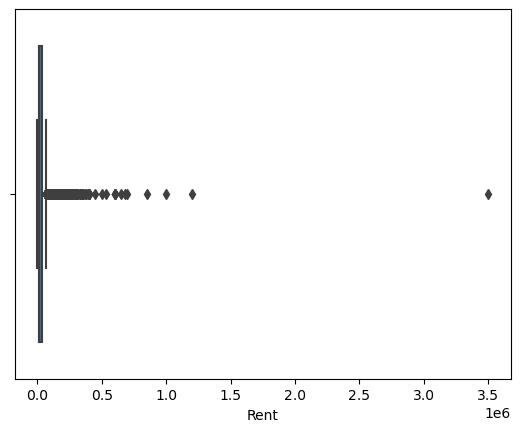

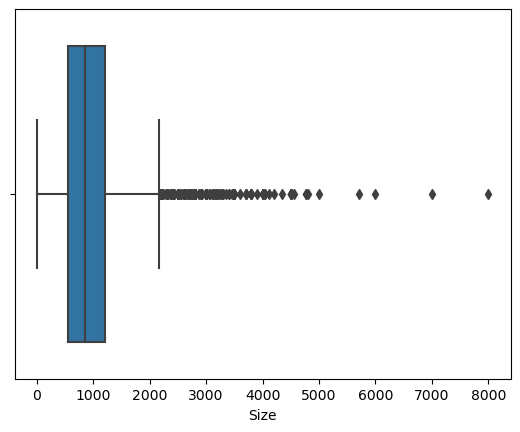

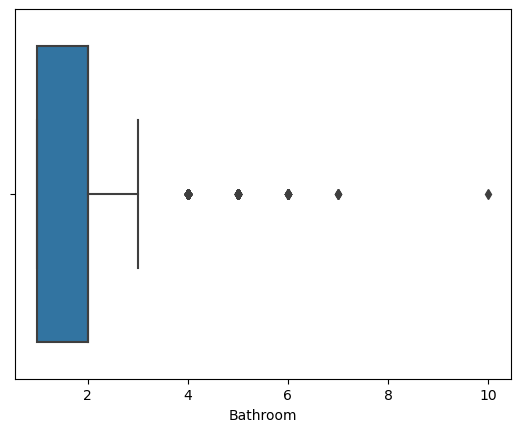

In [12]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(x=df[i])
        plt.show()

## OUTLIER TREATMENT

In [13]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [14]:
for column in df.columns:
    if df[column].dtype!="object":
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

In [15]:
df.dropna(inplace=True)

##  KDE PLOT

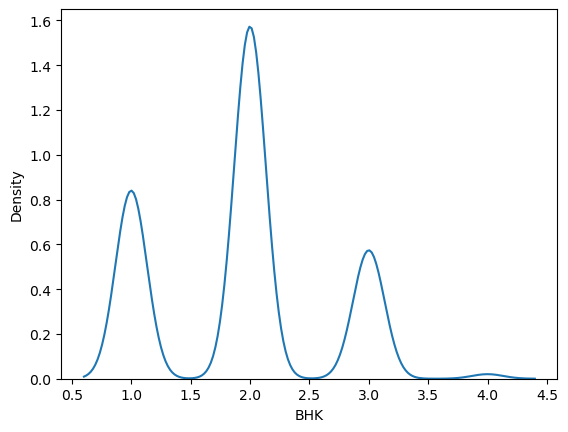

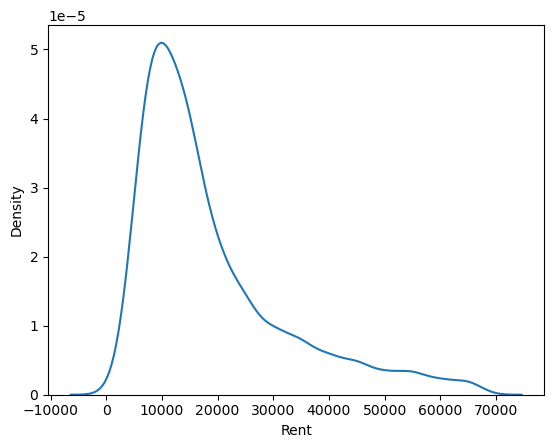

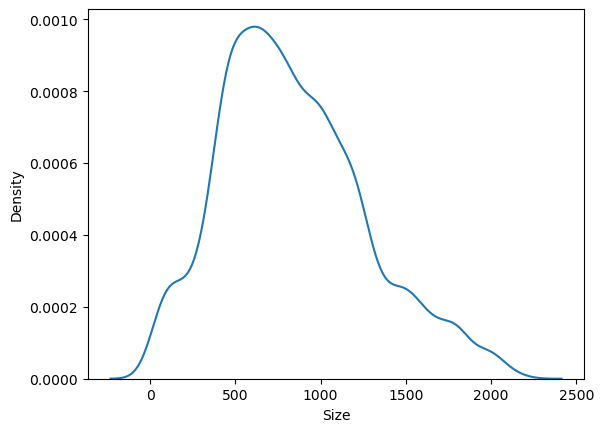

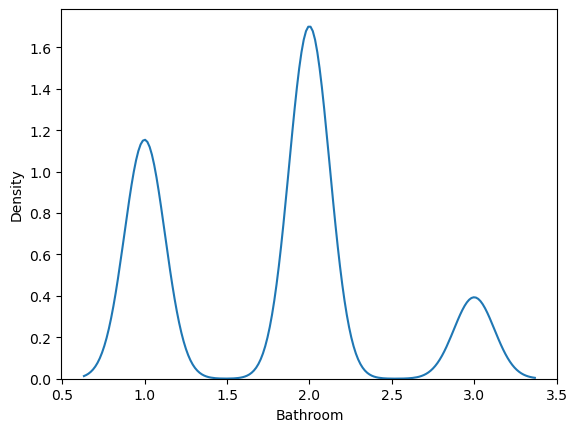

In [16]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot(x=df[i])
        plt.show()

## HISTOGRAM
 

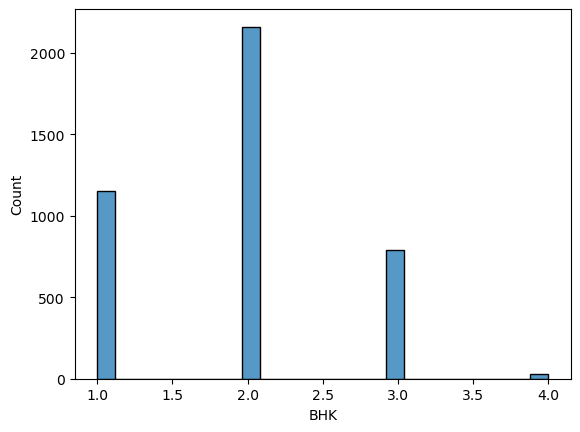

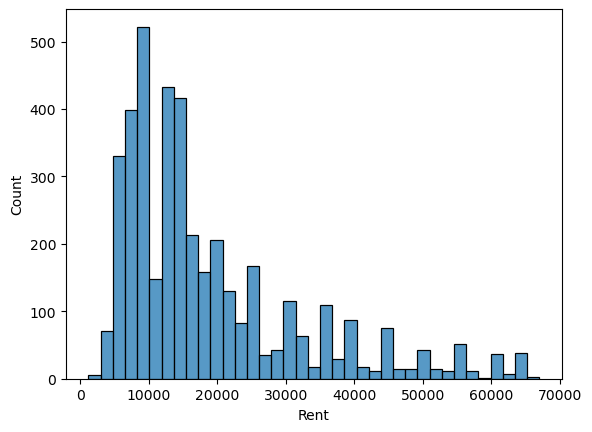

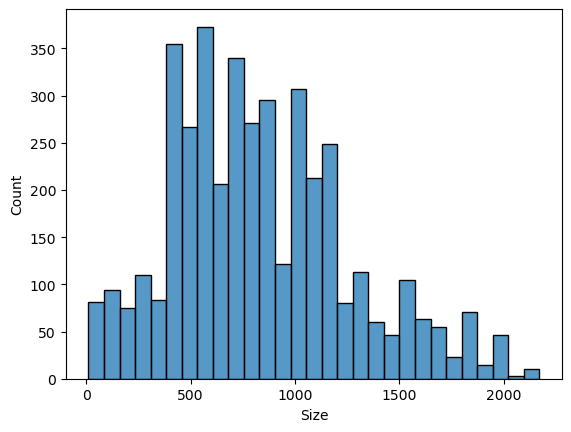

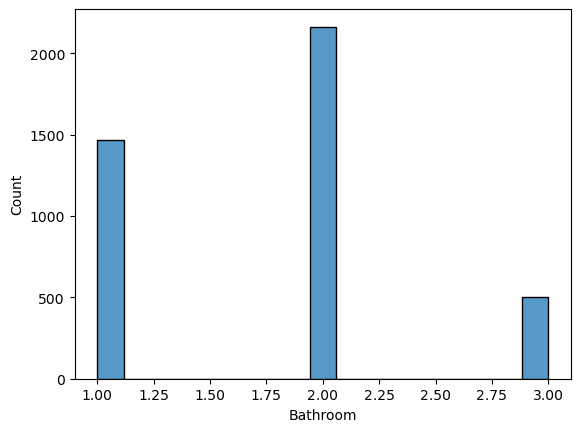

In [17]:
#Histograms are similar to bar charts and display the same categorical variables against the category of data. 
#Histograms display these categories as bins which indicate the number of data points in a range. 
#It is best for visualizing continuous data

for i in df.columns:
    if df[i].dtype!="object":
        sns.histplot(x=df[i])
        plt.show()

## <i> Multivariate analysis

## Bar chart

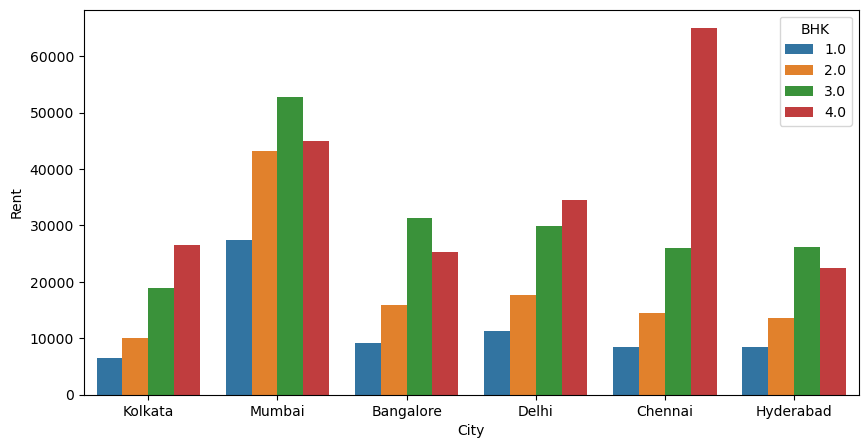

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["City"], y=df["Rent"], hue=df["BHK"], ci=None)
plt.show()

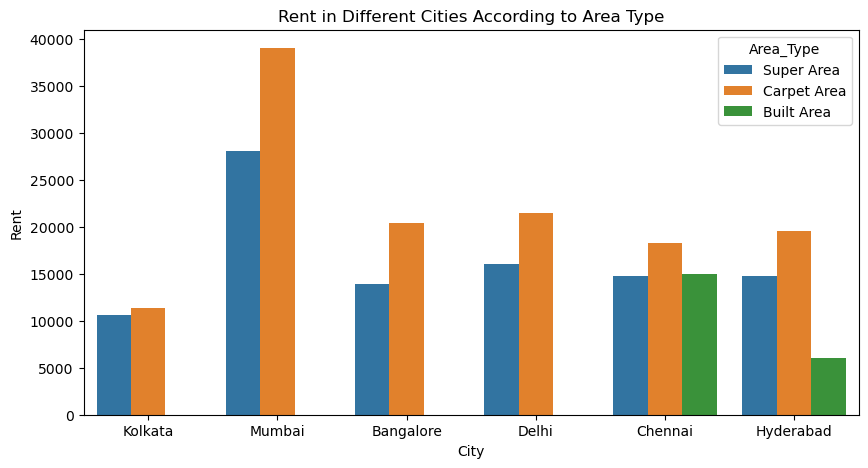

In [19]:
#Now, we can also look at the rent of the houses in different cities according to the area type:
plt.figure(figsize=(10,5))
plt.title("Rent in Different Cities According to Area Type")
sns.barplot(x=df["City"], y=df["Rent"], hue=df["Area_Type"], ci=None)
plt.show()

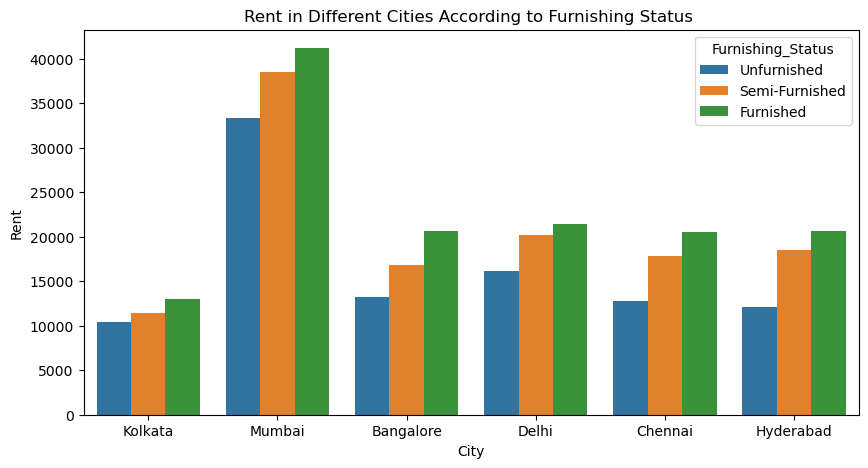

In [20]:
plt.figure(figsize=(10,5))
plt.title("Rent in Different Cities According to Furnishing Status ")
sns.barplot(x=df["City"], y=df["Rent"], hue=df['Furnishing_Status'], ci=None)
plt.show()

## Line chart

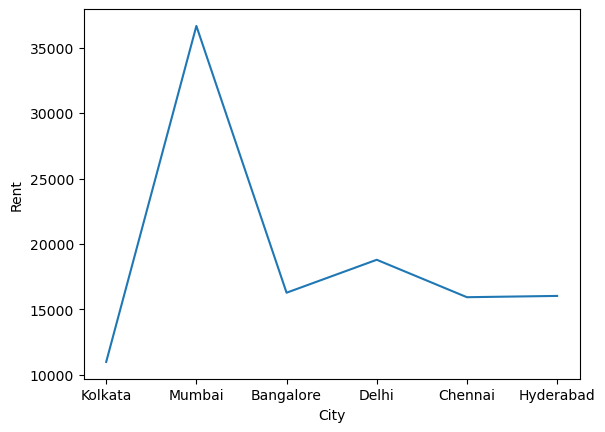

In [21]:
sns.lineplot(data=df,x="City",y="Rent",ci=None);
plt.show()

plot shows how the average rental price (Rent) varies across different cities (City). Each point on the line represents the mean rental price for a particular City value, and the line connects these points to show the overall trend.

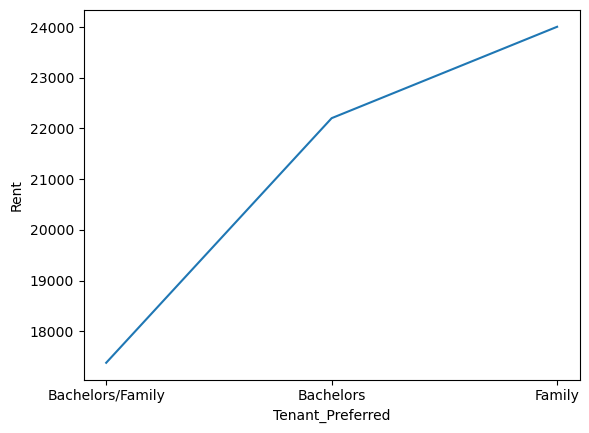

In [22]:
sns.lineplot(data=df,x='Tenant_Preferred',y='Rent',ci=None);
plt.show()

The resulting plot shows how the average rental price (Rent) varies for each type of preferred tenant (Tenant_Preferred). Each point on the line represents the mean rental price for a particular Tenant_Preferred value, and the line connects these points to show the overall trend.

# Pairplot


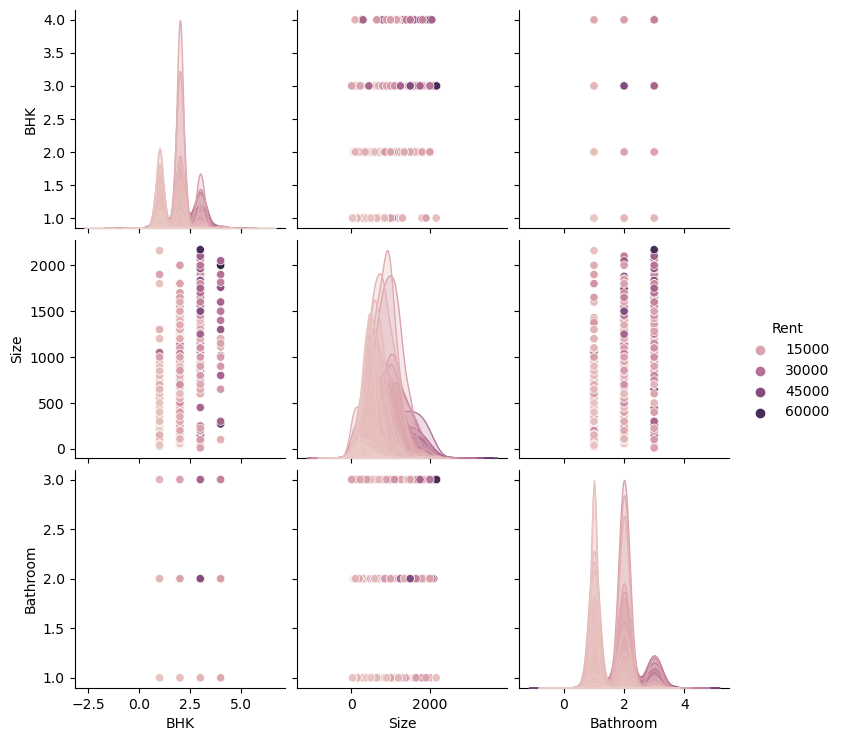

In [23]:
sns.pairplot(df,hue='Rent')
plt.show()

It creates a grid of pairwise scatterplots for all numerical columns in a given pandas DataFrame. The diagonal of the grid shows a histogram of each individual column.

## PIE CHART

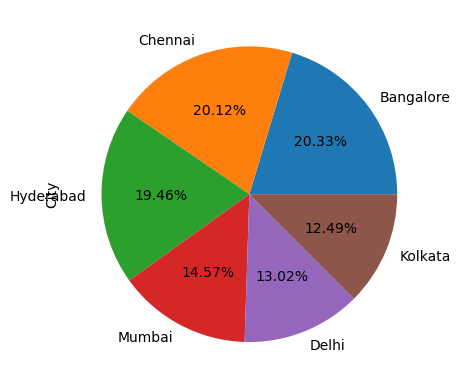

In [24]:
df.City.value_counts().plot.pie(autopct = '%1.2f%%');


20%  of the Houses are in Bangalore and Chennai . 19.46% of the Houses are Hyderabad.

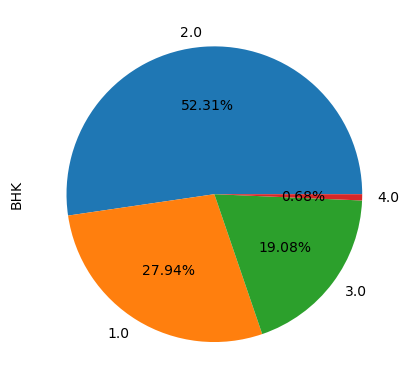

In [25]:
df.BHK.value_counts().plot.pie(autopct = '%1.2f%%');

This pie graph shows Number of Bedrooms, Hall, Kitchen. So, in summary,  generating  pie chart to visualize the distribution of the number of bedrooms, hall, and kitchen in the rental properties represented by the BHK column, showing the percentage of rental properties with each distinct number of BHK.

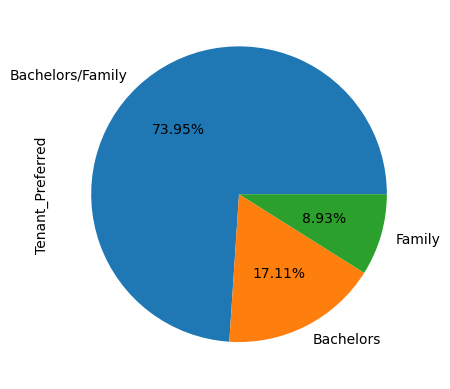

In [26]:
df.Tenant_Preferred.value_counts().plot.pie(autopct = '%1.2f%%');

pie chart to visualize the distribution of preferred tenant types for the rental properties represented by the Tenant_Preferred column, showing the percentage of rental properties with each distinct tenant type preference.

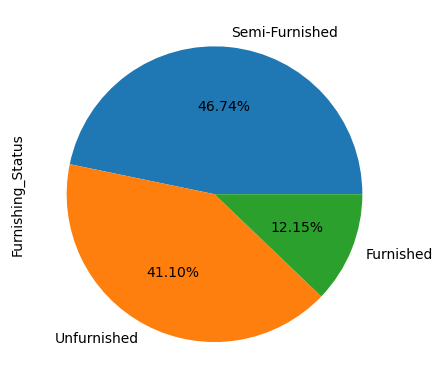

In [27]:
df.Furnishing_Status.value_counts().plot.pie(autopct = '%1.2f%%');

pie chart conclusion:
46.74% of the Houses are Semi Furnished. 41.10% of the Houses are Unfurnished. Rest of the Houses are Furnished.pie chart to visualize the distribution of furnishing statuses for the rental properties represented by the Furnishing_Status column, showing the percentage of rental properties with each distinct furnishing status.

## Label Encoding

In [28]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area_Type',
       'Area_Locality', 'City', 'Furnishing_Status', 'Tenant_Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [29]:
column = ['Posted On','Floor','Area_Type','Area_Locality','City','Furnishing_Status','Tenant_Preferred','Point of Contact']
le = LabelEncoder()
df[column]=df[column].apply(le.fit_transform)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4131 non-null   int32  
 1   BHK                4131 non-null   float64
 2   Rent               4131 non-null   float64
 3   Size               4131 non-null   float64
 4   Floor              4131 non-null   int32  
 5   Area_Type          4131 non-null   int32  
 6   Area_Locality      4131 non-null   int32  
 7   City               4131 non-null   int32  
 8   Furnishing_Status  4131 non-null   int32  
 9   Tenant_Preferred   4131 non-null   int32  
 10  Bathroom           4131 non-null   float64
 11  Point of Contact   4131 non-null   int32  
dtypes: float64(4), int32(8)
memory usage: 290.5 KB


### CHECKING THE CORRELATION WITH THE TARGET 

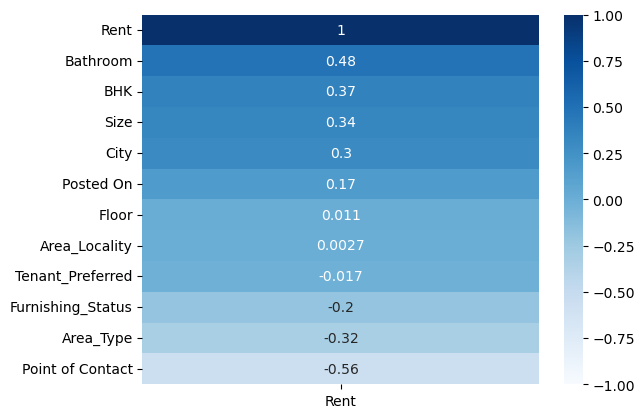

In [50]:
sns.heatmap(df.corr()[['Rent']].sort_values(by='Rent',ascending=False),vmin=-1,vmax=1,annot=True,cmap='Blues');

### <i>LETS TAKE ONLY THE COLUMNS WITH GOOD CORRELATION WITH THE TARGET

In [32]:
x=df[["Size","BHK","Bathroom","Posted On","City","Area_Locality"]].values
y=df[["Rent"]].values

### FEATURE SCALING

In [33]:
sc=StandardScaler()
x=sc.fit_transform(x)

#The standardized x array can then be used as input to a machine learning model,
#which can improve the model's performance by reducing the impact of differences in scale between the different features.

## Model building

In [34]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}",format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model:{} LinearRegression
AVERAGE RMSE:  11474.753616687498
****************************************************************************************************
cross validation model:{} Ridge
AVERAGE RMSE:  11474.303306124228
****************************************************************************************************
cross validation model:{} LinearSVR
AVERAGE RMSE:  19305.29299113474
****************************************************************************************************
cross validation model:{} DecisionTreeRegressor
AVERAGE RMSE:  10280.240850184933
****************************************************************************************************
cross validation model:{} AdaBoostRegressor
AVERAGE RMSE:  9085.605730429686
****************************************************************************************************
cross validation model:{} RandomForestRegressor
AVERAGE RMSE:  7947.3215062541585
******************************************

### We may proceed with Randomforest regressor as it is having the least RMSE

In [36]:
model= RandomForestRegressor()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#The data is split randomly into training and testing sets to ensure that the model can generalize to new, unseen data. 
#The test set is used to evaluate the performance of the model on data that it has not seen before,
#which gives a more accurate estimate of the model's performance on new data.

In [38]:
model.fit(x_train,y_train)

#After training, the model will be able to predict the target variable for new input features that it has not seen before.
#However, the accuracy of the model's predictions on new data is evaluated using the testing data that was set aside earlier,
#not the training data used to fit the model.

RandomForestRegressor()

In [39]:
y_pred=model.predict(x)

#y_pred will contain an array of predicted values for the target variable, one for each row in the original dataset.

In [40]:
OUTPUT = pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTION"),dtype=float)

In [41]:
OUTPUT.head(10)

,ACTUAL,PREDICTION
0,10000.0,11220.00
1,20000.0,9680.38
2,17000.0,13877.92
3,10000.0,9990.00
4,7500.0,12360.84
5,7000.0,7965.00
6,10000.0,10235.00
7,5000.0,4888.00
8,26000.0,20235.00
9,10000.0,11165.00


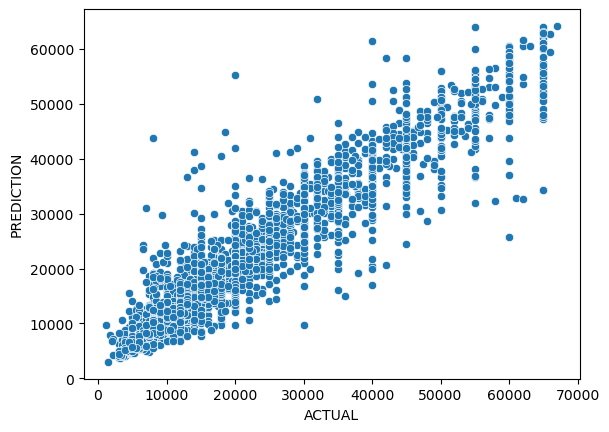

In [42]:
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");

In [45]:
model.score(x,y)

0.8976222757951698

### <mark>conclusion:
<p><strong> dataset of actual and predicted house rents provided, it appears that the model used for rent prediction is not very accurate. This can be seen from the differences between the actual and predicted rent amounts, which range from -4020.38 to 8877.92.

Some of the predictions are close to the actual rent amounts, such as data point 3 where the predicted rent is only 
    
ten dollar  less than the actual rent. However, there are also some large errors, such as data point 2 where the predicted rent is almost 3000 dollar higher than the actual rent.

Overall, it seems that the model may need further refinement or additional data in order to make more accurate predictions on house rents.<p><strong>